# Requesting GeoTIFF data through NCI's THREDDS Data Server

---------

## In this notebook:

1. <a href='#part1'>Manually using THREDDS Web Coverage Service</a>
2. <a href='#part2'>Using Python and the OWSLib package</a>


#### The material uses Geoscience Australia's Landsat8 Data Collection which are available under the Create Commons License 4.0 through NCI's THREDDS Data Server. For more information on the collection, [click here](http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_8228_7170_1486). 

---------

<br>


<a id='part1'></a> 
## 1. Manually using THREDDS Web Coverage Service (WCS)

To extract data through the Web Coverage Service, a `GetCoverage` URL request needs to be constructed. 


**The request takes the following form:**

> `http://dapds00.nci.org.au/thredds/wcs/<thredds-path-to-data-file>?`<FONT COLOR="red">service</FONT>=WCS&<FONT COLOR="red">version</FONT>=1.0.0&<FONT COLOR="red">request</FONT>=GetCoverage&<FONT COLOR="red">coverage</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="red">format</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">bbox</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">time</FONT>=<FONT COLOR="#00cc99">value</FONT>&<FONT COLOR="blue">crs</FONT>=<FONT COLOR="#00cc99">value</FONT>value

where <FONT COLOR="red">red</FONT> indicates required fields, <FONT COLOR="blue">blue</FONT> are optional, and <FONT COLOR="00cc99">green</FONT> are where inputs values relevant to the dataset and user request need to be defined. 

**GetCoverage parameters:**

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WCS                                                          |
|version      |     Required        |  `1.0.0`                                                          |
|request      |     Required        | `GetCoverage`                                                     |
|coverage     |     Required        | `<variable>`                                                      |
|format       |     Required        | `GeoTIFF  `, `GeoTIFF_Float  `, `NetCDF3  `                       |
|bbox`*`         |     Required/Optional        | `<xmin,ymin,xmax,ymax>`                                           |
|time`*`         |     Required/Optional        | `<time_value>`                                                    |
|srs, or crs  |     Optional        | `<srs_value>` or `<crs_value>`                                    |

`*`For large files and/or files with a time dimension, these might be necessary. If `bbox` is not defined the entire spatial domain will be returned (if server limits allow) and if `time` is not specified, either the first or sometimes last timestep is returned. 

#### Once providing the appropriate values for the dataset, a URL can now be generated that will return the requested coverage (in this example the output is returned in the GeoTIFF format):
(When selecting or inputing this URL into a web browser, a file download should commence.)

> http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc?service=WCS&version=1.0.0&request=GetCoverage&coverage=band_2&format=GeoTIFF&time=2013-12-11T01:51:06.153Z

<br></br>

#### Where to find the valid input values?

The WCS link on NCI's THREDDS catalog page will retrieve a WCS `GetCapabilities` request. This provides a list of the valid WCS operations and parameters, which can be helpful in constructing `GetCoverage` requests. If the `request=` option in the URL is changed to `DescribeCoverage`, additional information can be found. 

Start by selecting the desired file from NCI THREDDS Catalog page:

<img src="./images/thredds13.png">

Then by selecting the **WCS** link:

<img src="./images/thredds14.png">

This will display the `GetCapabilities` page:

<img src="./images/thredds15.png">



**GetCapabilities example:**

http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc?service=WCS&version=1.0.0&request=GetCapabilities

**DescribeCoverage example:**

http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc?service=WCS&version=1.0.0&request=DescribeCoverage

### Let's verify the request using GDAL

In [1]:
import gdal
import matplotlib.pyplot as plt 
%matplotlib inline

#### Open/extract data

In [2]:
ds = gdal.Open('./data/WCS346460317402991834.tif')
band = ds.GetRasterBand(1).ReadAsArray()

#### Plot

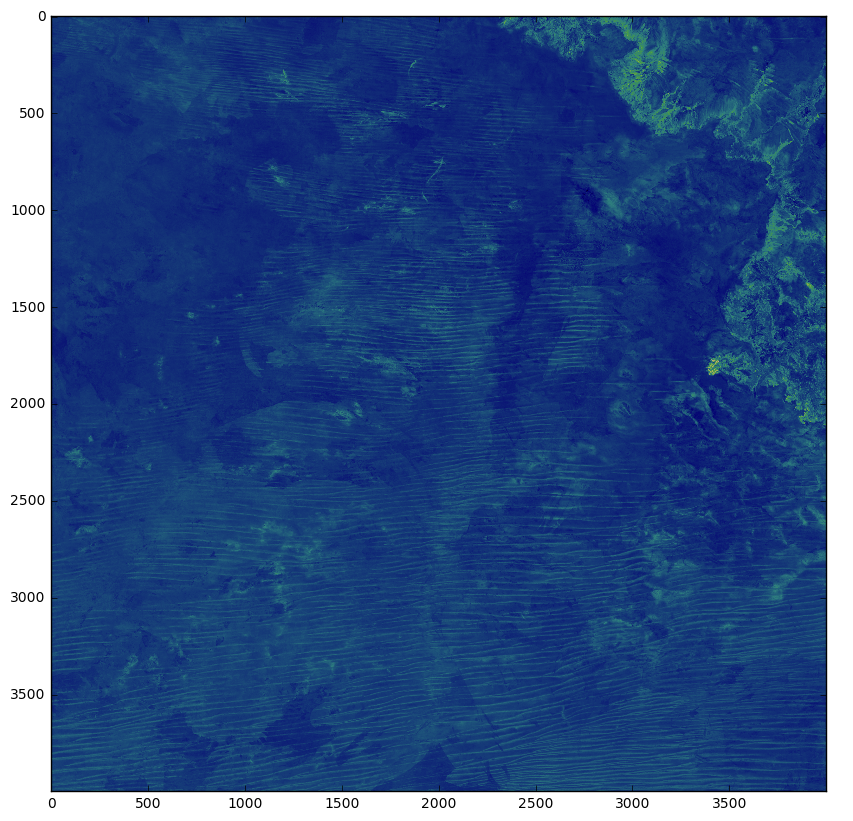

In [3]:
fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gist_earth')

<a id='part2'></a> 
## 2. Using Python and the OWSLib 

OWSLib is a useful Python package when working with Open Geospatial Consortium (OGC) web service standards, such as Web Coverage Service (WCS) and Web Map Service (WMS). For more information: https://github.com/geopython/OWSLib

In [4]:
from owslib.wcs import WebCoverageService

### Start with the base WCS URL from THREDDS

> `http://dapds00.nci.org.au/thredds/wcs/<thredds-path-to-data-file.nc>`

In [5]:
wcs_url = 'http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc'

### Use OWSLib to retrieve server metadata

In [6]:
wcs = WebCoverageService(wcs_url)

In [7]:
layers = list(wcs.contents)
print("Available layers: \n")
for l in layers:
    print l

Available layers: 

band_6
band_7
band_4
band_5
band_2
band_3
band_1


### Select desired layer

In [8]:
b2 = wcs['band_2']

#### The layer will also have associated metadata. Several of these fields will be used directly in the GetCoverage request in the next few steps.

In [9]:
print(b2.title)
print(b2.supportedFormats)
print(b2.supportedCRS)
print(b2.boundingBoxWGS84)

Nadir BRDF Adjusted Reflectance 0.45-0.51 microns (Blue)
['GeoTIFF', 'GeoTIFF_Float', 'NetCDF3']
[urn:ogc:def:crs:EPSG::9822, urn:ogc:def:crs:::-1]
(122.44965707180641, -19.330552895498727, 123.46537802472493, -18.367507163631146)


#### The available time positions for the file:

In [10]:
print(b2.timepositions)

['2013-03-26T01:44:16.825Z', '2013-03-26T01:44:40.664Z', '2013-04-15T01:51:20.207Z', '2013-04-15T01:51:44.145Z', '2013-04-24T01:45:06.111Z', '2013-04-24T01:45:30.055Z', '2013-05-01T01:51:09.559Z', '2013-05-26T01:45:23.116Z', '2013-05-26T01:45:47.049Z', '2013-06-11T01:45:20.457Z', '2013-06-11T01:45:44.393Z', '2013-06-18T01:51:27.541Z', '2013-06-18T01:51:51.472Z', '2013-06-27T01:45:16.815Z', '2013-06-27T01:45:40.752Z', '2013-07-04T01:51:05.656Z', '2013-07-04T01:51:29.589Z', '2013-07-04T01:51:53.527Z', '2013-07-11T01:57:17.054Z', '2013-07-11T01:57:40.987Z', '2013-07-13T01:45:19.185Z', '2013-07-13T01:45:43.113Z', '2013-07-20T01:51:04.427Z', '2013-07-20T01:51:28.362Z', '2013-07-20T01:51:52.297Z', '2013-07-27T01:57:16.693Z', '2013-07-27T01:57:40.629Z', '2013-07-29T01:45:19.509Z', '2013-07-29T01:45:43.446Z', '2013-08-05T01:51:07.525Z', '2013-08-05T01:51:31.463Z', '2013-08-05T01:51:55.406Z', '2013-08-12T01:57:18.201Z', '2013-08-12T01:57:42.144Z', '2013-08-14T01:45:20.233Z', '2013-08-14T01:45:4

### Constructing and executing the WCS GetCoverage request

In [11]:
output = wcs.getCoverage(identifier='band_2', 
                         bbox=(b2.boundingBoxWGS84[0], b2.boundingBoxWGS84[1], b2.boundingBoxWGS84[2], b2.boundingBoxWGS84[3]),
                         format='GeoTIFF',
                         time=['2013-12-11T01:51:06.153Z'])

### Write received output to a file

In [12]:
filename = './data/owslib_wcs_file.tif'
with open(filename, 'wb') as f:
    f.write(output.read())

### Verify again with GDAL

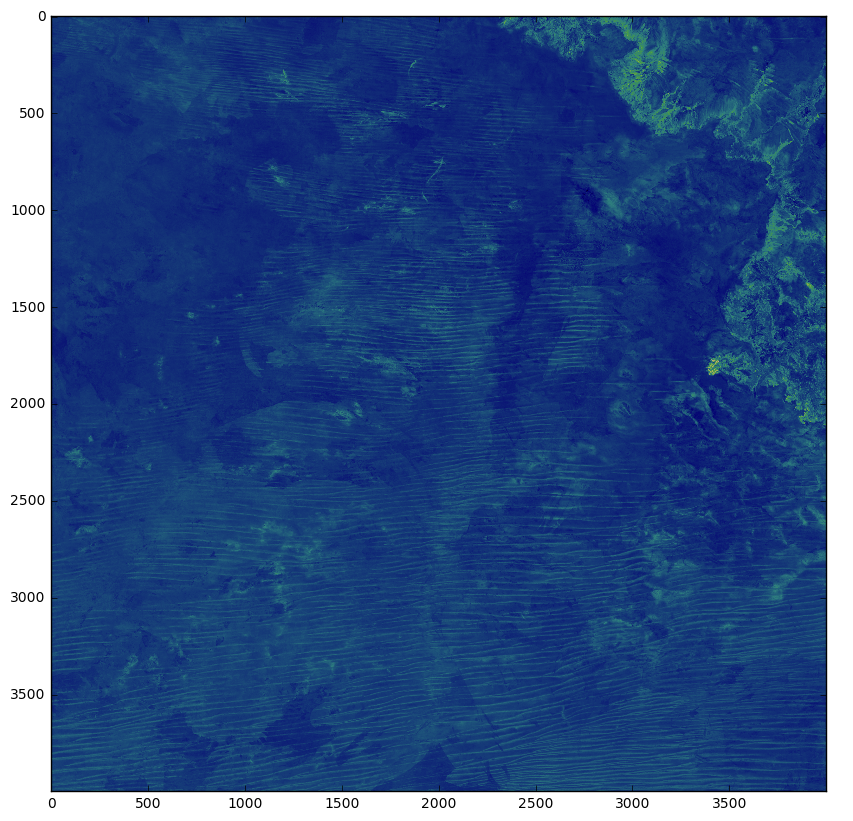

In [13]:
ds = gdal.Open('./data/owslib_wcs_file.tif')
band = ds.GetRasterBand(1).ReadAsArray()
fig = plt.figure(figsize=(10,10))
plt.imshow(band, cmap='gist_earth')